In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,azure_yn,sql_yn,excel_yn
0,DATA SCIENTIST,$55K-$93K (Glassdoor est.),POSITION SUMMARY\nParticipate in the areas of ...,3.1,Preventice Solutions\n3.1,"Eagan, MN","Houston, TX",501 to 1000 employees,-1,Company - Private,...,MN,0,-1,1,0,0,0,0,1,0
1,Data Scientist,$55K-$93K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,VA,0,52,0,0,0,0,0,1,0
2,Data Scientist,$55K-$93K (Glassdoor est.),***Please note: All hiring and recruitment at ...,3.6,Spring Health\n3.6,"New York, NY","New York, NY",1 to 50 employees,2016,Company - Private,...,NY,1,4,1,0,0,0,0,1,0
3,Data Scientist,$55K-$93K (Glassdoor est.),The Opportunity\n\nEversight is the recognized...,4.2,Eversight\n4.2,"Palo Alto, CA","Palo Alto, CA",51 to 200 employees,2013,Company - Private,...,CA,1,7,1,0,0,0,0,0,0
4,Data Scientist / Machine Learning Expert,$55K-$93K (Glassdoor est.),Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,...,MA,0,24,1,0,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or  'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
##Job Title
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    905
na                424
analyst           307
data engineer     243
mle               118
manager             2
director            1
Name: job_simp, dtype: int64

In [8]:
## Seniority

df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        1341
senior     659
Name: seniority, dtype: int64

In [9]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2549
1       3962
2       5173
3       3872
4       5045
        ... 
1995    2815
1996    6757
1997    3748
1998    2070
1999    1677
Name: desc_len, Length: 2000, dtype: int64

In [10]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp

0       3
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: num_comp, Length: 2000, dtype: int64

In [11]:
#hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,azure_yn,sql_yn,excel_yn,desc_len,num_comp
count,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.813250,1862.820000,0.0,0.0,75.011000,127.466000,101.238500,0.467500,37.882000,0.689000,0.000500,0.278500,0.248500,0.122000,0.589500,0.035500,3857.131500,0.425500
std,0.530094,470.898704,0.0,0.0,8.189409,12.487466,9.863722,0.499067,62.651622,0.463019,0.022361,0.448373,0.432251,0.327368,0.492048,0.185086,1727.828514,0.987389
min,-1.000000,-1.000000,0.0,0.0,55.000000,93.000000,74.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,399.000000,0.000000
25%,3.600000,1968.000000,0.0,0.0,74.000000,127.000000,100.500000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2480.000000,0.000000
50%,3.800000,2000.000000,0.0,0.0,74.000000,127.000000,100.500000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3639.000000,0.000000
75%,4.200000,2011.000000,0.0,0.0,74.000000,127.000000,100.500000,1.000000,31.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4892.000000,0.000000
max,5.000000,2019.000000,0.0,0.0,125.000000,198.000000,161.500000,1.000000,330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9688.000000,3.000000


In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

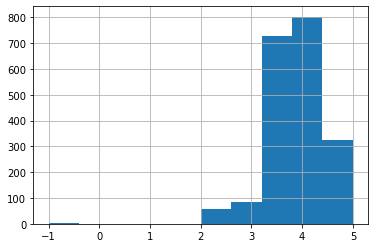

In [16]:
df.Rating.hist()

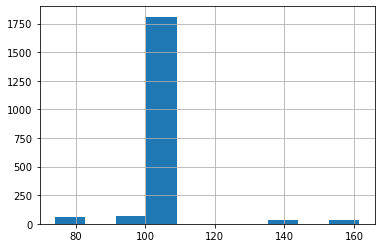

In [17]:
df.avg_salary.hist()

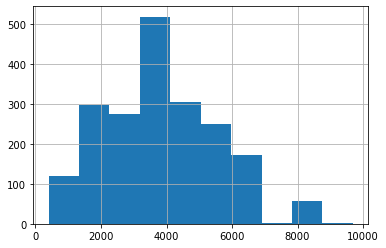

In [18]:
df.desc_len.hist()

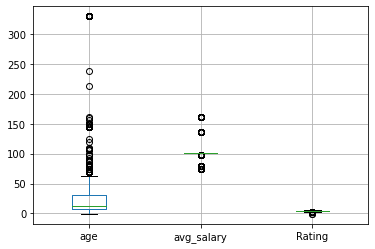

In [19]:
df.boxplot(column = ['age','avg_salary','Rating'])

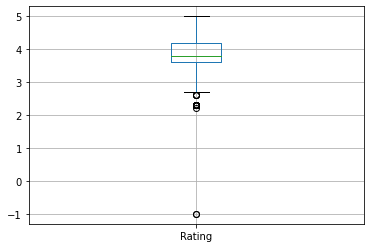

In [20]:
df.boxplot(column = 'Rating')

In [21]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.013712,-0.133068,0.219784
avg_salary,-0.013712,1.000000,0.028179,-0.019318
Rating,-0.133068,0.028179,1.000000,-0.097500
desc_len,0.219784,-0.019318,-0.097500,1.000000


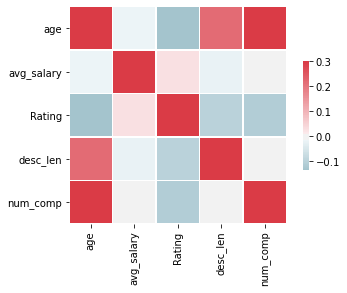

In [22]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [24]:
df_cat = df[['Location', 'Headquarters', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 
       'company_txt', 'job_state', 'same_state','python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'excel_yn', 'job_simp',
       'seniority']]

graph for Location: total = 111


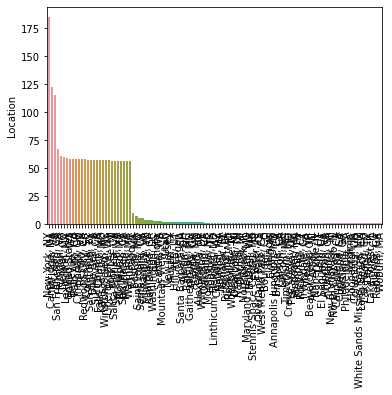

graph for Headquarters: total = 107


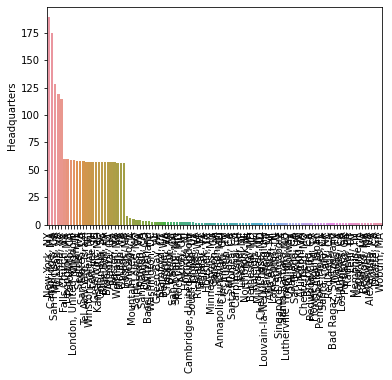

graph for Size: total = 9


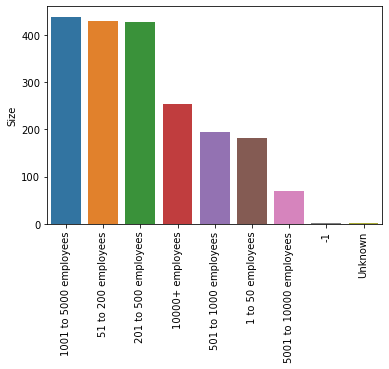

graph for Type of ownership: total = 10


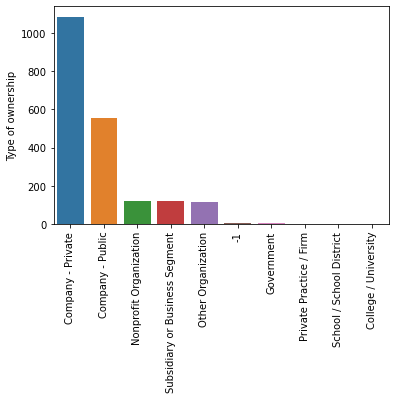

graph for Industry: total = 40


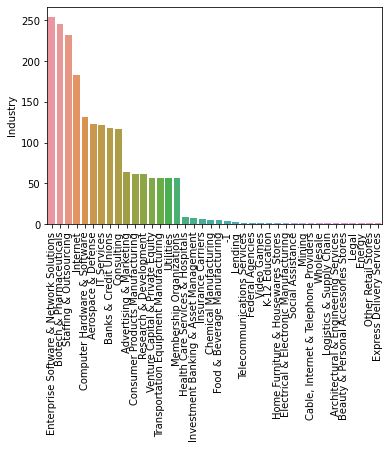

graph for Sector: total = 19


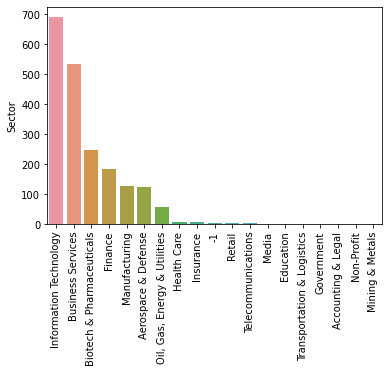

graph for Revenue: total = 14


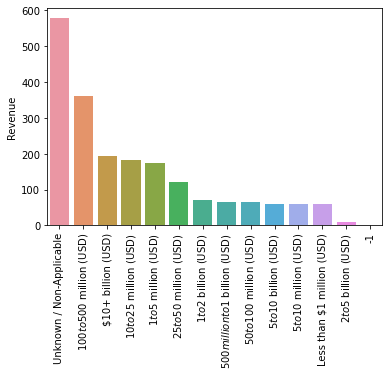

graph for company_txt: total = 181


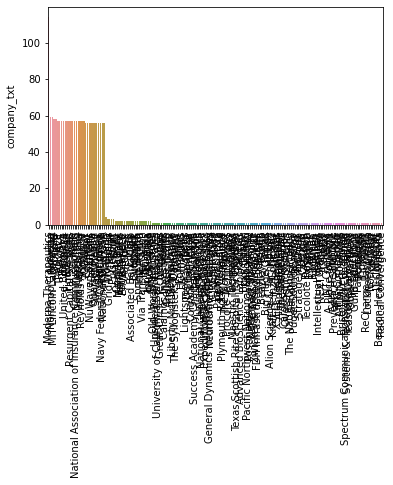

graph for job_state: total = 33


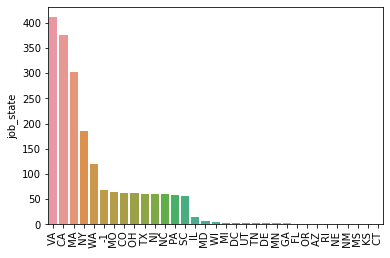

graph for same_state: total = 2


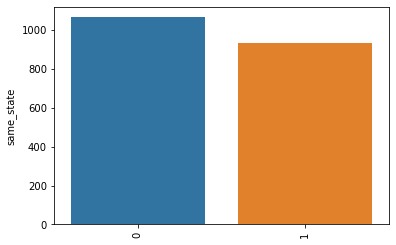

graph for python_yn: total = 2


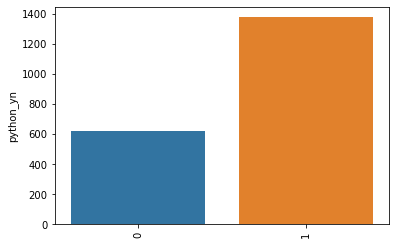

graph for R_yn: total = 2


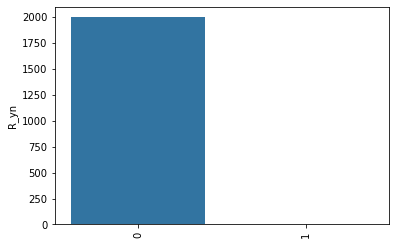

graph for spark_yn: total = 2


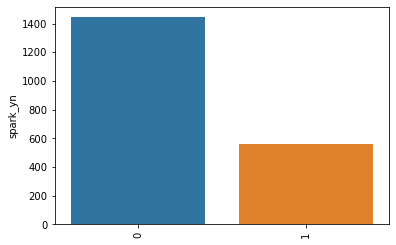

graph for aws_yn: total = 2


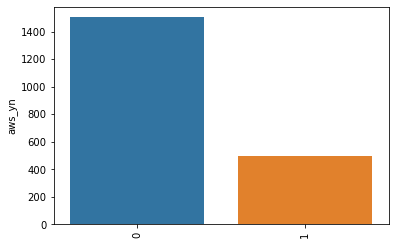

graph for azure_yn: total = 2


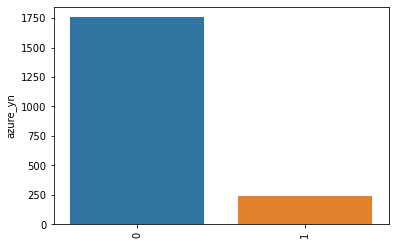

graph for sql_yn: total = 2


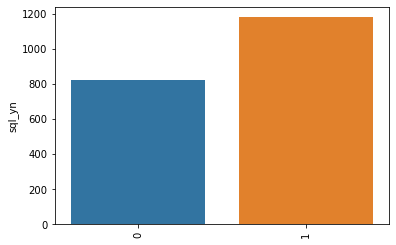

graph for excel_yn: total = 2


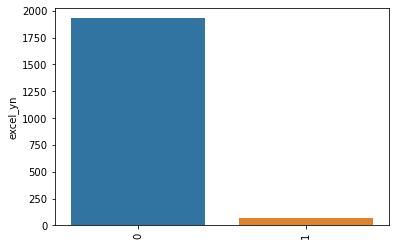

graph for job_simp: total = 7


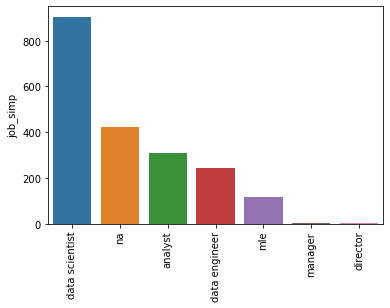

graph for seniority: total = 2


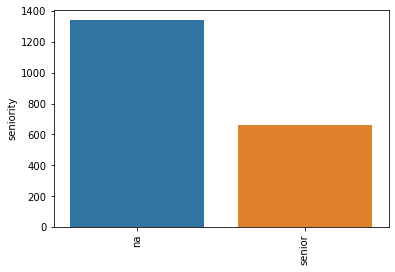

In [25]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()
    

graph for Location: total = 20


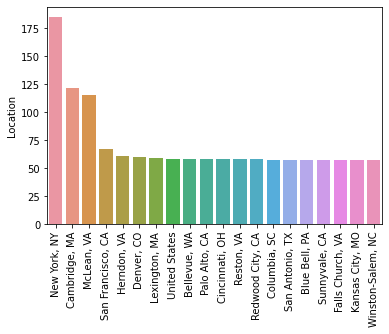

graph for Headquarters: total = 20


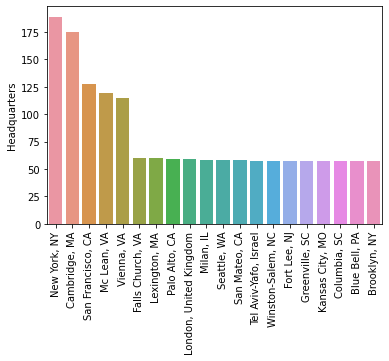

graph for company_txt: total = 20


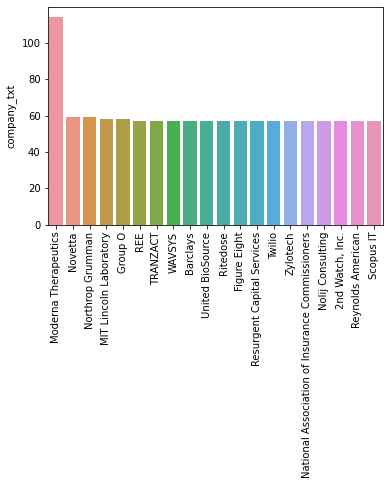

In [26]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [28]:
pd.pivot_table(df,index = 'job_simp',values = 'avg_salary')

,avg_salary
job_simp,
analyst,100.962541
data engineer,103.057613
data scientist,100.988950
director,80.000000
manager,149.000000
mle,102.008475
na,100.538915


In [29]:
pd.pivot_table(df,index = ['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na         101.400524
               senior     100.241379
data engineer  na         102.453975
               senior     139.125000
data scientist na         100.812500
               senior     101.336066
director       na          80.000000
manager        na         161.500000
               senior     136.500000
mle            na         102.418033
               senior     101.570175
na             na         100.538306
               senior     100.539773

In [30]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index = ['job_state','job_simp'],values = 'avg_salary').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                  
-1        na               89.250000
          data scientist   99.568182
          analyst          74.000000
 WI       na               77.000000
          data scientist   77.000000
 WA       data scientist  100.927419
          analyst         100.500000
 VA       data scientist  100.767956
          analyst         100.661017
          data engineer   101.570175
          mle             102.603448
          na              100.500000
 UT       data scientist   80.000000
          data engineer   161.500000
 TX       data scientist  108.250000
          data engineer   100.465517
          analyst          80.000000
 TN       analyst         161.500000
          data scientist   98.500000
 SC       na              100.500000
 RI       data scientist   97.000000
 PA       data scientist   98.500000
          analyst         100.146552
 OR       analyst          98.500000
 OH       na               88.500000
          data scientist  130.000000
          data engineer   100.500000
          analyst          97.000000
 NY       data scientist   99.564516
          data engineer   161.500000
          analyst         136.500000
          na              100.347458
 NM       data scientist   97.000000
 NJ       na               97.000000
          data scientist  100.438596
          data engineer   161.500000
          analyst          98.500000
 NE       analyst          97.000000
 NC       data scientist   89.250000
          na              100.663793
 MS       na              136.500000
 MO       na               97.000000
          data scientist  108.000000
          data engineer   136.500000
          analyst         101.120690
 MN       na               74.000000
          data scientist   74.000000
 MI       manager         149.000000
          data scientist   97.000000
 MD       data engineer   161.500000
          analyst          97.000000
          data scientist  108.250000
          na              149.000000
 MA       na              100.203390
          mle             136.500000
          data scientist   99.737903
          data engineer   101.120690
          analyst         129.250000
 KS       data scientist   74.000000
 IL       director         80.000000
          data engineer   161.500000
          data scientist  108.000000
          mle             120.750000
          na              124.000000
 GA       data scientist  129.250000
 FL       data engineer   161.500000
 DE       data scientist  136.500000
          data engineer   161.500000
 DC       data scientist  116.750000
          analyst          80.000000
 CT       na              136.500000
 CO       na               80.000000
          mle              80.000000
          data scientist   88.500000
          analyst         100.043103
 CA       data scientist  102.630435
          data engineer   117.250000
          analyst         114.700000
          mle             100.500000
          na              100.146552
 AZ       data engineer    97.000000

In [31]:
pd.pivot_table(df,index = ['job_state','job_simp'],values = 'avg_salary', aggfunc = 'count').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                  
-1        na                       2
          data scientist          66
          analyst                  1
 WI       na                       2
          data scientist           2
 WA       data scientist          62
          analyst                 57
 VA       data scientist         181
          analyst                 59
          data engineer           57
          mle                     58
          na                      56
 UT       data scientist           2
          data engineer            1
 TX       data scientist           2
          data engineer           58
          analyst                  1
 TN       analyst                  1
          data scientist           1
 SC       na                      57
 RI       data scientist           1
 PA       data scientist           1
          analyst                 58
 OR       analyst                  1
 OH       na                       2
          data scientist           2
          data engineer           57
          analyst                  1
 NY       data scientist         124
          data engineer            1
          analyst                  1
          na                      59
 NM       data scientist           1
 NJ       na                       1
          data scientist          57
          data engineer            1
          analyst                  1
 NE       analyst                  1
 NC       data scientist           2
          na                      58
 MS       na                       1
 MO       na                       1
          data scientist           4
          data engineer            1
          analyst                 58
 MN       na                       1
          data scientist           1
 MI       manager                  2
          data scientist           1
 MD       data engineer            1
          analyst                  1
          data scientist           2
          na                       2
 MA       na                     118
          mle                      1
          data scientist         124
          data engineer           58
          analyst                  2
 KS       data scientist           1
 IL       director                 1
          data engineer            1
          data scientist           8
          mle                      2
          na                       3
 GA       data scientist           2
 FL       data engineer            1
 DE       data scientist           1
          data engineer            1
 DC       data scientist           2
          analyst                  1
 CT       na                       1
 CO       na                       2
          mle                      1
          data scientist           2
          analyst                 58
 CA       data scientist         253
          data engineer            4
          analyst                  5
          mle                     56
          na                      58
 AZ       data engineer            1

In [32]:
pd.pivot_table(df[df.job_simp == 'data scientist'],index = 'job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
DE,136.500000
OH,130.000000
GA,129.250000
DC,116.750000
MD,108.250000
TX,108.250000
MO,108.000000
IL,108.000000
CA,102.630435


In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'azure_yn', 'sql_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [34]:
#rating, industry, sector, revenue, number if comp, hourly, employer provided, python, r, spark, aws, excel,desc_len, type of ownership

In [35]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'sql_yn','azure_yn', 'Type of ownership','avg_salary']]

In [36]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
 2.8    161.500000
 4.7    143.900000
 4.9    126.100000
 2.6    123.750000
-1.0    120.750000
 2.9    106.300000
 4.3    105.500000
 4.0    104.250000
 4.1    103.707692
 5.0    103.210938
 3.0    102.500000
 4.5    102.457746
 3.1    102.067164
 3.4    101.620968
 4.2    101.426966
 3.9    101.290960
 3.2    101.088710
 3.5    100.679167
 2.3    100.500000
 4.4    100.405983
 3.6    100.285714
 3.3    100.176471
 4.6    100.140351
 3.8    100.018817
 3.7     99.292683
 4.8     98.666667
 2.2     98.500000
 2.7     98.375000
Industry
                                         avg_salary
Industry                                           
Other Retail Stores                      161.500000
Legal                                    161.500000
Home Furniture & Housewares Stores       161.500000
Express Delivery Services                161.500000
Cable, Internet & Telephone Providers    136.500000
Lending                                  132.33333

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [37]:
pd.pivot_table(df_pivots, index = 'Revenue',columns = 'python_yn', values = 'avg_salary',aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),2.0,68.0
$1 to $5 million (USD),114.0,60.0
$10 to $25 million (USD),7.0,175.0
$10+ billion (USD),60.0,133.0
$100 to $500 million (USD),177.0,184.0
$2 to $5 billion (USD),4.0,5.0
$25 to $50 million (USD),117.0,5.0
$5 to $10 billion (USD),NaN,59.0
$5 to $10 million (USD),NaN,59.0


In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

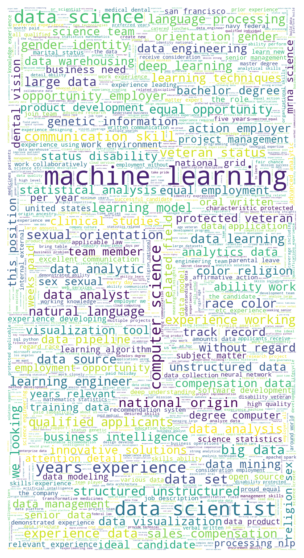

In [43]:

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()